#### Map of trend (slope) 1979-2022 of:
 - Annual max Tmax  (units C/decade)
 - Annual number of days of frozen precip (units days)
 
 https://en.wikipedia.org/wiki/List_of_counties_in_Oregon
casper_2020

In [1]:
import calendar
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 
from datetime import timedelta, date
import mapclassify as mc
import geoplot as gplt

In [2]:
def rd_ts(dir_i, var_s): 
    '''
    read time series data from a csv file
    and return a DataFrame
    '''
    flnm = dir_i + var_s + "_1981-2021.csv"
    print('read in ', flnm)
 
    df = pd.read_csv(flnm)

    # convert date column to DateTime
    df['date'] = pd.to_datetime(df.date)

    # note: convert index to DatetimeIndex so I can use groupby year later on
    df.index =  pd.to_datetime(df.date)
    
    return df

def cal_trend_huc2_1d(arr_2d):
    '''
    arr_2d(year, n_shp) 
    calculate trend of 2D array
    '''
    
    n_shp = arr_2d.shape[1]
    trend_1d = np.zeros(n_shp)

    for nr in range(n_shp):
        arr_1d = arr_2d[:,nr]
        # first degree polynomial. linear regression 
        trend_1d[nr] = np.polyfit(range(len(arr_1d)), arr_1d,1)[0]
    return trend_1d

#### read csv time-series files

In [3]:
dir_i = '/glade/campaign/mmm/c3we/mingge/INNOVATOR/DATA/'

df_tmax = rd_ts(dir_i, 'Tmax')
df_tmin = rd_ts(dir_i, 'Tmin')
df_prec = rd_ts(dir_i, 'PR')

year_s = df_tmax.year[0]
year_e = df_tmax.year[-1]

# get column name by df.columns
name_col = df_tmax.columns
print('columns are:', name_col)

read in  /glade/campaign/mmm/c3we/mingge/INNOVATOR/DATA/Tmax_1981-2021.csv
read in  /glade/campaign/mmm/c3we/mingge/INNOVATOR/DATA/Tmin_1981-2021.csv
read in  /glade/campaign/mmm/c3we/mingge/INNOVATOR/DATA/PR_1981-2021.csv
columns are: Index(['date', 'year', 'season', 'Clackamas', 'Columbia', 'Multmomah',
       'Washington', 'Yamhill'],
      dtype='object')


#### read shapefile and pick/merge 3 counties

In [4]:
flnm_shp = '/glade/work/mingge/SHAPEFILES/counties.shp'
shp_gpd = gpd.read_file(flnm_shp)
 
# Clackamas 005 2;  Multnomah 051 25; Washington 067 33
id_s = ['005', '051', '067']
n_county = len(id_s)

## Merging Data: Appending DataFrames
gdf1 = shp_gpd[shp_gpd.COUNTY == id_s[0]]
gdf2 = shp_gpd[shp_gpd.COUNTY == id_s[1]]
gdf3 = shp_gpd[shp_gpd.COUNTY == id_s[2]]

new_gpd = pd.concat([gdf1, gdf2, gdf3])

#### convert everything to latitude and longitude in geometry
####  "EPSG:4326" : CRS=WGS84 latitude-longitude projection
new_gpd = new_gpd.to_crs('EPSG:4326')

new_gpd['lon_centroid'] = new_gpd.centroid.x
new_gpd['lat_centroid'] = new_gpd.centroid.y

new_gpd

/glade/scratch/mingge/ipykernel_295627/2910250391.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  new_gpd['lon_centroid'] = new_gpd.centroid.x
/glade/scratch/mingge/ipykernel_295627/2910250391.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  new_gpd['lat_centroid'] = new_gpd.centroid.y


,ID,STFID,COUNTY,TAPERSONS,TA1RACE,TAWHITE,TABLACK,TAAMERIND,TAASIAN,TAHAWPAC,...,TN4RACES,TN5RACES,TN6RACES,ALLAFAM,ALLAMIND,ALLASIAN,ALLNHPI,geometry,lon_centroid,lat_centroid
2,1,41005,005,338391,330061,308852,2233,2416,8292,569,...,38,18,0,3497,5256,10921,1348,"POLYGON ((-122.63724 45.46112, -122.63650 45.4...",-122.221525,45.188663
25,1,41051,051,660486,633622,522825,37434,6785,37638,2320,...,101,35,0,44755,14701,45012,4419,"POLYGON ((-122.85432 45.59182, -122.85670 45.5...",-122.415730,45.546896
33,1,41067,067,445342,431216,366007,5119,2913,29752,1325,...,37,6,1,7307,6183,35197,2876,"POLYGON ((-122.78711 45.54843, -122.78481 45.5...",-123.098537,45.560109


#### Trend of annual max Tmax map

Index(['Clackamas', 'Columbia', 'Multmomah', 'Washington'], dtype='object')
trend [0.28495188 0.14275295 0.1650441 ]
    ID  STFID COUNTY  TAPERSONS  TA1RACE  TAWHITE  TABLACK  TAAMERIND  \
2    1  41005    005     338391   330061   308852     2233       2416   
25   1  41051    051     660486   633622   522825    37434       6785   
33   1  41067    067     445342   431216   366007     5119       2913   

    TAASIAN  TAHAWPAC  ...  TN5RACES  TN6RACES  ALLAFAM  ALLAMIND  ALLASIAN  \
2      8292       569  ...        18         0     3497      5256     10921   
25    37638      2320  ...        35         0    44755     14701     45012   
33    29752      1325  ...         6         1     7307      6183     35197   

    ALLNHPI                                           geometry  lon_centroid  \
2      1348  POLYGON ((-122.63724 45.46112, -122.63650 45.4...   -122.221525   
25     4419  POLYGON ((-122.85432 45.59182, -122.85670 45.5...   -122.415730   
33     2876  POLYGON ((-122.78711

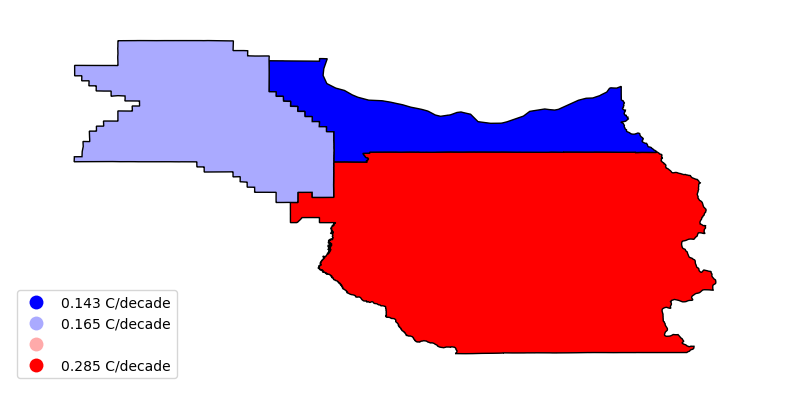

In [5]:
# Index(['date', 'year', 'season', 'Clackamas', 'Columbia', 'Multmomah','Washington', 'Yamhill']
# 0-based index for Clackamas, Multmomah and Washington are:
id_col = [3,5,6]
print(df_tmax.columns[3:7])

# get time-series of those locations
df_max = df_tmax[[name_col[id_col[0]], name_col[id_col[1]],name_col[id_col[2]]]].groupby(lambda x: x.year).max()
arr_2d = df_max.to_numpy() 

# treand in decade 
trend_1d = cal_trend_huc2_1d(arr_2d)*10
print('trend',trend_1d)

import mapclassify as mc
### create a common scheme for trend plots
arr_1d =np.linspace(0.1, 0.3, 11)
scheme = mc.Quantiles(arr_1d, k = 4)

fig, axs = plt.subplots(nrows=1, ncols=1,figsize=(8,5))
new_gpd['Tmax'] = np.asarray(trend_1d)
print(new_gpd)

legend_labels=['0.143 C/decade','0.165 C/decade','', '0.285 C/decade']
gplt.choropleth(new_gpd, hue='Tmax', scheme = scheme, cmap='bwr', legend=True,legend_labels=legend_labels, ax=axs)
#axs.set_title(season_s[nn], fontsize=12)
plt.tight_layout();
plt.savefig('tmax_trend_map.pdf', bbox_inches='tight')

#### Trend of annual number of days of frozen precip map  

trend [-4.04355401 -2.97560976 -3.43205575]


/glade/scratch/mingge/ipykernel_295627/334422453.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Clackamas_Tmin'] = df_tmin['Clackamas'].values
/glade/scratch/mingge/ipykernel_295627/334422453.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Multmomah_Tmin'] = df_tmin['Multmomah'].values
/glade/scratch/mingge/ipykernel_295627/334422453.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

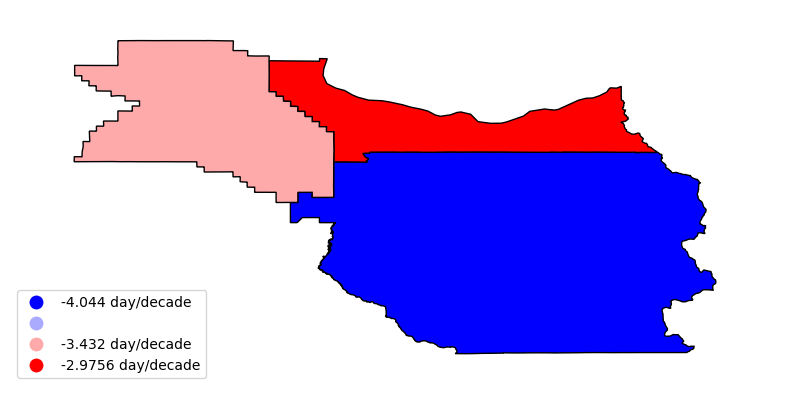

In [6]:
# get time-series of those locations
#df_min = df_tmin[[name_col[id_col[0]], name_col[id_col[1]],name_col[id_col[2]]]].groupby(lambda x: x.year).max()

df_new = df_prec[["year", "Clackamas", "Multmomah", "Washington"]]

# add Tmin info
df_new['Clackamas_Tmin'] = df_tmin['Clackamas'].values
df_new['Multmomah_Tmin'] = df_tmin['Multmomah'].values
df_new['Washington_Tmin'] = df_tmin['Washington'].values

# Re-create a new array of date, now including all years
years = list(range(1981,2022)) 

for nc in range(n_county):
    name_p = name_col[id_col[nc]]
    name_t = name_p + '_Tmin'
    # pick rows of frozen precip: Prec >0 and Tmin <0
    df_tmp = df_new.loc[(df_new[name_p] >0 ) & (df_new[name_t] < 0 )]  
    # count # of days of prozen prec
    dff = df_tmp[name_p].groupby(lambda x: x.year).agg('count') 
    # Reindex the count and fill empty values with zero (NaN by default)
    dff = dff.reindex(years, fill_value=0)
    #print(dff)
    arr_2d[:,nc] = dff.values
    
# treand in decade 
trend_1d = cal_trend_huc2_1d(arr_2d)*10
print('trend', trend_1d)

import mapclassify as mc
### create a common scheme for trend plots
arr_1d =np.linspace(-4.1, -2.8, 11)
scheme = mc.Quantiles(arr_1d, k = 4)

fig, axs = plt.subplots(nrows=1, ncols=1,figsize=(8,5))
new_gpd['FrozenPrec'] = np.asarray(trend_1d)
#print(new_gpd)

legend_labels=['-4.044 day/decade','','-3.432 day/decade','-2.9756 day/decade']
gplt.choropleth(new_gpd, hue='FrozenPrec', scheme = scheme, cmap='bwr', legend=True,
                legend_labels=legend_labels,ax=axs)
#axs.set_title(season_s[nn], fontsize=12)
plt.tight_layout();
plt.savefig('precFrozon_trend_map.pdf', bbox_inches='tight')

In [7]:
scheme.bins 

array([-3.775, -3.45 , -3.125, -2.8  ])

In [8]:
scheme

Quantiles             

   Interval      Count
----------------------
[-4.10, -3.77] |     3
(-3.77, -3.45] |     3
(-3.45, -3.12] |     2
(-3.12, -2.80] |     3